In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
import pylab
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

train_ini_00 = pd.read_csv("./stock_train_data_20171006.csv", sep=',', delimiter=None)
test_ini_00 = pd.read_csv("./stock_test_data_20171006.csv", sep=',', delimiter=None)

Using TensorFlow backend.


## 僅限於week5 使用(column['feature77'] = 0.5)

## 僅限於week5 使用(column['feature77'] = 0.5)

In [12]:
train_ini_00['feature77'] = 0.5
test_ini_00['feature77'] = 0.5

In [13]:
from sklearn.preprocessing import normalize

from sklearn import preprocessing

train_ini=train_ini_00.copy(deep=True)
test_ini=test_ini_00.copy(deep=True)

for i in range(1,89,1):
    train_ini.iloc[:,i]=preprocessing.scale(train_ini_00.iloc[:,i])
    test_ini.iloc[:,i]=preprocessing.scale(test_ini_00.iloc[:,i])

In [74]:
test_ini

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,392418,0.088970,-0.012451,0.226408,-1.386858,-1.066616,0.636430,-0.805733,-0.478093,-0.536539,...,-0.785307,-0.491378,-0.291151,0.120415,-0.807633,-0.394544,-0.681540,-0.707518,-0.775872,19
1,392419,-1.004904,-0.034484,-0.345187,0.179278,-0.393074,0.752589,2.233694,0.651315,1.896860,...,-0.079682,1.490679,-0.082252,-1.079956,1.607502,-1.805872,-0.149094,-0.108615,1.492027,15
2,392420,1.100924,-0.023984,-0.329857,0.661071,1.076176,0.414028,0.194951,0.833402,0.778437,...,1.596572,0.640618,1.219347,-1.060589,0.290406,0.772820,1.368938,1.088984,-0.433057,9
3,392421,0.939863,-0.018097,0.008183,-1.418409,0.359216,-0.135353,-1.482310,-0.057569,0.169539,...,0.110845,0.145179,0.516610,-0.260976,0.265216,1.133491,0.500493,0.038265,-0.783961,14
4,392422,-0.146653,-0.016357,0.019047,0.035251,-0.577442,-0.068010,-1.572975,-0.329777,0.267620,...,0.737593,0.037424,0.027635,0.544575,0.036731,-0.131309,-0.877661,0.461268,-0.238349,15
5,392423,0.837824,-0.020683,0.273588,1.056372,-0.230143,0.573043,0.645608,-0.483777,-0.217809,...,0.996371,-0.438168,0.167159,1.013741,-0.541207,-0.093378,-0.391347,0.692741,-0.636414,1
6,392424,1.040767,-0.152174,0.344835,-0.737765,0.245411,1.330195,-0.122921,0.752297,0.385699,...,3.819098,1.698990,0.942540,-1.111067,0.019530,1.077803,1.040696,2.926289,1.866744,21
7,392425,-0.699206,-0.035928,0.175071,-0.173649,-0.001234,0.419827,-0.073032,0.496059,-0.486717,...,-0.748197,-0.190228,-0.558712,1.102890,-0.556398,0.783577,-0.040264,-0.633712,0.313645,19
8,392426,-1.250826,-0.018475,0.129181,-0.010234,-1.590578,-1.054722,-0.402337,0.551442,-1.204170,...,-0.653698,-0.896002,-1.498425,0.071348,-0.934304,-2.766871,-0.817718,-0.609713,-0.771024,7
9,392427,1.069376,0.019059,0.642103,0.213534,-0.151496,-0.172658,-0.396895,-0.149623,-0.384482,...,0.680009,0.175432,-0.185755,-0.756882,-0.433311,0.301302,0.215193,0.201869,0.829680,7


## group: (1,28) -> (0,27)

In [81]:
test_ini['group']=test_ini['group']-1

In [82]:
max(test_ini['group'])

27

In [90]:
train_ini['group']=train_ini['group']-1

## onehot

In [78]:
from keras.utils import np_utils

In [161]:
group_test_OneHot = np_utils.to_categorical(test_ini['group'], num_classes=max(test_ini['group'])+1)
group_train_OneHot = np_utils.to_categorical(train_ini['group'], num_classes=max(train_ini['group'])+1)

In [163]:
group_train_OneHot[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [164]:
train_ini['group'][0]

20

In [96]:
type(train_ini)

pandas.core.frame.DataFrame

In [98]:
import pandas

In [119]:
train_array_ini=pandas.DataFrame.as_matrix(train_ini)
test_array_ini=pandas.DataFrame.as_matrix(test_ini)

In [120]:
train_array_ini.shape

(392418, 93)

In [121]:
test_array_ini.shape

(211675, 90)

## ndarray, copy不需要deep (call by value)

### train

In [140]:
train_array=train_array_ini.copy()
test_array=test_array_ini.copy()

In [141]:
train_array.shape

(392418, 93)

In [143]:
import numpy

In [147]:
train_array=np.delete(train_array, numpy.s_[89:93], 1)

In [149]:
train_array=np.delete(train_array, 0, 1)

In [150]:
train_array.shape

(392418, 88)

### test

In [154]:
test_array.shape

(211675, 90)

In [157]:
test_array=np.delete(test_array, 89, 1)

In [159]:
test_array=np.delete(test_array, 0, 1)

In [160]:
test_array.shape

(211675, 88)

## (完成)array預處理
## 要把onehot加進去

In [165]:
group_train_OneHot.shape

(392418, 28)

In [166]:
group_test_OneHot.shape

(211675, 28)

In [185]:
train_array1=np.concatenate((train_array, group_train_OneHot), axis=1)

In [186]:
test_array1=np.concatenate((test_array, group_test_OneHot), axis=1)

In [187]:
train_array1.shape

(392418, 116)

In [188]:
test_array1.shape

(211675, 116)

In [189]:
train_array1=preprocessing.scale(train_array1)

In [190]:
test_array1=preprocessing.scale(test_array1)

In [191]:
train_array1.shape

(392418, 116)

In [195]:
max(train_array1.mean(axis=0))

4.4177785643614695e-14

In [196]:
max(train_array1.std(axis=0))

1.0000000000082259

In [197]:
max(test_array1.mean(axis=0))

3.5105033062333394e-15

In [198]:
max(test_array1.std(axis=0))

1.0000000000041245

In [200]:
train_array1.shape

(392418, 116)

In [201]:
test_array1.shape

(211675, 116)

In [202]:
>>> np.save('train_array1', train_array1)
>>> np.save('test_array1', test_array1)

In [206]:
xx=np.load('train_array1.npy')
yy=np.load('test_array1.npy')

In [207]:
xx.shape

(392418, 116)

In [208]:
yy.shape

(211675, 116)

# ====================================

In [213]:
y=pandas.DataFrame.as_matrix(train_ini_00['label'])

In [214]:
X = np.load('train_array1.npy')

In [217]:
>>> from sklearn.neighbors.nearest_centroid import NearestCentroid
>>> import numpy as np
>>> clf = NearestCentroid()
>>> clf.fit(X, y)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [221]:
print(clf.predict(yy))

[ 0.  1.  1. ...,  0.  0.  1.]


In [234]:
a=clf.predict(yy)

In [235]:
a.shape

(211675,)

In [236]:
result = pd.read_csv("./upload.csv", sep=',', delimiter=None)

In [247]:
result['label']=a*1.0

In [249]:
result.to_csv("result.csv", sep=',', encoding='utf-8')

http://dataaspirant.com/2016/12/27/k-nearest-neighbor-algorithm-implementaion-python-scratch/

In [254]:
import math
def euclideanDist(x, xi):
    d = 0.0
    for i in range(len(x)-1):
        d += pow((float(x[i])-float(xi[i])),2)
        d = math.sqrt(d)
    return d

In [324]:
import heapq
from operator import itemgetter
def knn_predict(test_data, train_data, k_value, train_label):
    A=[]
    for ii in range(0,test_data.shape[0],1):
        eu_Distance =[]
        knn = []
        good = 0
        bad = 0
        for jj in range(0,train_data.shape[0],1):
            i=test_data[ii]
            j=train_data[jj]
            eu_dist = euclideanDist(i, j)
            eu_Distance.append([jj,eu_dist])
            
        #eu_Distance=sorted(eu_Distance, key=itemgetter(0))
        #knn = eu_Distance[:k_value]    
        knn = heapq.nsmallest(k_value, eu_Distance, key=itemgetter(0))
            
        for k in knn:
            if train_label[k[0]] ==1:
                good += 1
            else:
                bad +=1
                
        A.append(float(good)/float(k_value))
        print(ii,"/",test_data.shape[0])
        
    return A
        #if good > bad:
        #    i.append('g')
        #elif good < bad:
        #    i.append('b')
        #else:
        #    i.append('NaN')

In [325]:
A=knn_predict(X, yy, 5, y)

0 / 392418
1 / 392418
2 / 392418
3 / 392418
4 / 392418
5 / 392418
6 / 392418
7 / 392418
8 / 392418
9 / 392418
10 / 392418
11 / 392418
12 / 392418
13 / 392418
14 / 392418
15 / 392418
16 / 392418
17 / 392418
18 / 392418
19 / 392418
20 / 392418
21 / 392418
22 / 392418
23 / 392418
24 / 392418
25 / 392418
26 / 392418
27 / 392418
28 / 392418
29 / 392418
30 / 392418
31 / 392418
32 / 392418
33 / 392418
34 / 392418
35 / 392418
36 / 392418
37 / 392418
38 / 392418
39 / 392418
40 / 392418
41 / 392418
42 / 392418
43 / 392418
44 / 392418
45 / 392418
46 / 392418
47 / 392418
48 / 392418
49 / 392418
50 / 392418
51 / 392418
52 / 392418
53 / 392418
54 / 392418
55 / 392418
56 / 392418
57 / 392418
58 / 392418
59 / 392418
60 / 392418
61 / 392418
62 / 392418
63 / 392418
64 / 392418
65 / 392418
66 / 392418
67 / 392418
68 / 392418
69 / 392418
70 / 392418
71 / 392418
72 / 392418
73 / 392418
74 / 392418
75 / 392418
76 / 392418
77 / 392418
78 / 392418
79 / 392418
80 / 392418
81 / 392418
82 / 392418
83 / 392418
84

639 / 392418
640 / 392418
641 / 392418
642 / 392418
643 / 392418
644 / 392418
645 / 392418
646 / 392418
647 / 392418
648 / 392418
649 / 392418
650 / 392418
651 / 392418
652 / 392418
653 / 392418
654 / 392418
655 / 392418
656 / 392418
657 / 392418
658 / 392418
659 / 392418
660 / 392418
661 / 392418
662 / 392418
663 / 392418
664 / 392418
665 / 392418
666 / 392418
667 / 392418
668 / 392418
669 / 392418
670 / 392418
671 / 392418
672 / 392418
673 / 392418
674 / 392418
675 / 392418
676 / 392418
677 / 392418
678 / 392418
679 / 392418
680 / 392418
681 / 392418
682 / 392418
683 / 392418
684 / 392418
685 / 392418
686 / 392418
687 / 392418
688 / 392418
689 / 392418
690 / 392418
691 / 392418
692 / 392418
693 / 392418
694 / 392418
695 / 392418
696 / 392418
697 / 392418
698 / 392418
699 / 392418
700 / 392418
701 / 392418
702 / 392418
703 / 392418
704 / 392418
705 / 392418
706 / 392418
707 / 392418
708 / 392418
709 / 392418
710 / 392418
711 / 392418
712 / 392418
713 / 392418
714 / 392418
715 / 392418

KeyboardInterrupt: 

In [310]:
        eu_Distance =[]
        knn = []
        good = 0        
        bad = 0

In [270]:
test_data=X
train_data=yy

In [271]:
ii=0
jj=0
i=test_data[ii]
j=train_data[jj]

In [273]:
i.shape

(116,)

In [274]:
j.shape

(116,)

In [275]:
eu_dist = euclideanDist(i, j)

In [276]:
eu_dist

1.0254513781711219

In [294]:
eu_Distance.append([jj,eu_dist])

In [298]:
eu_Distance

[{0, 1.0254513781711219}, {-0.9745486218288781, 2}]

In [311]:
eu_Distance.append([2,1.0])
eu_Distance.append([1,0.8])
eu_Distance.append([3,-0.2])

In [314]:
from operator import itemgetter
hi=sorted(eu_Distance, key=itemgetter(1))

In [315]:
hi

[[3, -0.2], [1, 0.8], [2, 1.0]]

In [304]:
hi

[{0, 1.0254513781711219}, {-0.9745486218288781, 2}]

In [255]:
euclideanDist(X[0], yy[0])

1.0254513781711219

In [258]:
X.shape[0]

392418

In [229]:
import numpy as np
a.tofile('foo.csv',sep=',')

In [230]:
a

array([ 0.,  1.,  1., ...,  0.,  0.,  1.])

In [232]:
a

array([ 0.,  1.,  1., ...,  0.,  0.,  1.])

In [216]:
X.shape

(392418, 116)

In [215]:
y.shape

(392418,)

In [ ]:
from sklearn.neighbors import NearestNeighbors


In [173]:
sum(test_array1[:,115])

6110.0

# ====================================

In [156]:
test_ini

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,group
0,392418,0.088970,-0.012451,0.226408,-1.386858,-1.066616,0.636430,-0.805733,-0.478093,-0.536539,...,-0.785307,-0.491378,-0.291151,0.120415,-0.807633,-0.394544,-0.681540,-0.707518,-0.775872,18
1,392419,-1.004904,-0.034484,-0.345187,0.179278,-0.393074,0.752589,2.233694,0.651315,1.896860,...,-0.079682,1.490679,-0.082252,-1.079956,1.607502,-1.805872,-0.149094,-0.108615,1.492027,14
2,392420,1.100924,-0.023984,-0.329857,0.661071,1.076176,0.414028,0.194951,0.833402,0.778437,...,1.596572,0.640618,1.219347,-1.060589,0.290406,0.772820,1.368938,1.088984,-0.433057,8
3,392421,0.939863,-0.018097,0.008183,-1.418409,0.359216,-0.135353,-1.482310,-0.057569,0.169539,...,0.110845,0.145179,0.516610,-0.260976,0.265216,1.133491,0.500493,0.038265,-0.783961,13
4,392422,-0.146653,-0.016357,0.019047,0.035251,-0.577442,-0.068010,-1.572975,-0.329777,0.267620,...,0.737593,0.037424,0.027635,0.544575,0.036731,-0.131309,-0.877661,0.461268,-0.238349,14
5,392423,0.837824,-0.020683,0.273588,1.056372,-0.230143,0.573043,0.645608,-0.483777,-0.217809,...,0.996371,-0.438168,0.167159,1.013741,-0.541207,-0.093378,-0.391347,0.692741,-0.636414,0
6,392424,1.040767,-0.152174,0.344835,-0.737765,0.245411,1.330195,-0.122921,0.752297,0.385699,...,3.819098,1.698990,0.942540,-1.111067,0.019530,1.077803,1.040696,2.926289,1.866744,20
7,392425,-0.699206,-0.035928,0.175071,-0.173649,-0.001234,0.419827,-0.073032,0.496059,-0.486717,...,-0.748197,-0.190228,-0.558712,1.102890,-0.556398,0.783577,-0.040264,-0.633712,0.313645,18
8,392426,-1.250826,-0.018475,0.129181,-0.010234,-1.590578,-1.054722,-0.402337,0.551442,-1.204170,...,-0.653698,-0.896002,-1.498425,0.071348,-0.934304,-2.766871,-0.817718,-0.609713,-0.771024,6
9,392427,1.069376,0.019059,0.642103,0.213534,-0.151496,-0.172658,-0.396895,-0.149623,-0.384482,...,0.680009,0.175432,-0.185755,-0.756882,-0.433311,0.301302,0.215193,0.201869,0.829680,6


In [139]:
train_array.shape

(392418, 93)

In [125]:
train_ini

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature82,feature83,feature84,feature85,feature86,feature87,weight,label,group,era
0,0,-0.614041,0.114416,0.231052,1.273933,-0.299535,-0.076514,0.128355,-0.053832,-0.572873,...,1.134926,-0.755843,0.317429,-0.241113,-0.746367,-0.365467,4.0,0.0,20,1
1,1,0.986737,-0.276118,-0.626683,1.366301,-0.588178,1.323094,-0.808199,-0.177238,0.951274,...,-1.053611,0.567973,0.000057,0.325993,1.038188,-0.680053,6.0,0.0,4,1
2,2,0.396707,-1.748540,-2.120154,1.226534,0.398690,1.069129,-0.635431,0.747981,2.277830,...,-1.786568,2.328527,0.444290,1.362455,0.097616,0.614781,2.0,0.0,11,1
3,3,0.686342,0.119166,-0.141433,0.546838,2.436892,1.194097,-0.671772,0.356273,0.369298,...,-0.278068,0.306136,-0.026526,0.502339,0.116241,-0.915358,2.0,0.0,20,1
4,4,-0.488483,0.090380,0.074291,0.088601,-1.108423,-0.147028,-0.463876,-0.267537,-0.772068,...,-0.182212,-1.162430,-0.564973,-1.000597,-0.544647,-0.990627,7.0,0.0,3,1
5,5,0.151643,0.137570,0.399777,-1.400313,0.812501,0.098386,-0.323754,0.168058,-0.280357,...,0.600144,-0.255070,-0.026942,0.599934,-0.105256,-0.497817,5.0,0.0,6,1
6,6,0.862462,0.074743,-0.756178,0.714230,-0.227506,1.269414,-0.200736,0.234439,0.888671,...,-1.676531,0.446269,0.031392,0.781035,1.225703,-0.695879,8.0,0.0,13,1
7,7,0.271582,-0.012460,-0.103276,-0.911698,-0.242800,0.992016,-0.618712,-1.130434,-0.462614,...,-1.016529,-0.636494,-0.284672,-0.707933,-0.466095,-1.530306,1.0,0.0,7,1
8,8,0.985132,0.010269,-0.176043,1.380970,0.492982,1.321854,0.977000,0.357832,0.709694,...,-1.710409,-0.038793,-0.026687,0.235733,1.336808,-0.924962,0.0,0.0,14,1
9,9,0.273723,-0.018082,-0.455830,1.090874,-0.614171,1.018233,1.139140,0.344746,0.933291,...,-1.350233,0.874880,-0.025257,0.242308,-0.387662,-0.257792,9.0,0.0,20,1


In [136]:
train_ini.iloc[:,0]

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
392388    392388
392389    392389
392390    392390
392391    392391
392392    392392
392393    392393
392394    392394
392395    392395
392396    392396
392397    392397
392398    392398
392399    392399
392400    392400
392401    392401
392402    392402
392403    392403
392404    392404
392405    392405
392406    392406
392407    392407
392408    392408
392409    392409
392410    392410
392411    392411
392412    392412
392413    392413
392414    392414
392415    3924

In [ ]:
0

In [ ]:
np.delete(arr, [0,89,90,91,92], 1)

In [116]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [117]:
np.delete(arr, 0, 1) #np.delete(arr, 0, 1(0:row,1:col))

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [14]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

## Nearest Neighbors
http://scikit-learn.org/stable/modules/neighbors.html

In [48]:
>>> from sklearn.neighbors import NearestNeighbors
>>> import numpy as np
>>> X = np.array([[-4, 4],[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
>>> distances, indices = nbrs.kneighbors(X)
>>> indices                   

array([[0, 2, 1],
       [1, 2, 3],
       [2, 1, 3],
       [3, 2, 1],
       [4, 5, 6],
       [5, 4, 6],
       [6, 5, 4]])

In [49]:
distances

array([[ 0.        ,  5.38516481,  5.83095189],
       [ 0.        ,  1.        ,  2.23606798],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.41421356,  2.23606798],
       [ 0.        ,  1.        ,  2.23606798],
       [ 0.        ,  1.        ,  1.41421356],
       [ 0.        ,  1.41421356,  2.23606798]])

In [50]:
nbrs.kneighbors_graph(X).toarray()

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.]])

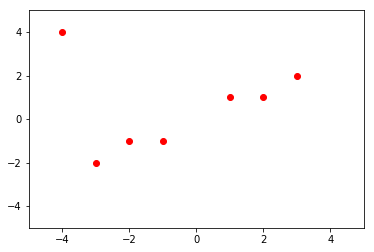

In [51]:
import matplotlib.pyplot as plt
plt.plot(X[:,0], X[:,1], 'ro')
plt.axis([-5, 5, -5, 5])
plt.show()

In [55]:
>>> from sklearn.neighbors import KDTree
>>> import numpy as np
>>> X = np.array([[-4, 4],[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> kdt = KDTree(X, leaf_size=30, metric='euclidean')
>>> kdt.query(X, k=3, return_distance=False)          

array([[0, 2, 1],
       [1, 2, 3],
       [2, 1, 3],
       [3, 2, 1],
       [4, 5, 6],
       [5, 4, 6],
       [6, 5, 4]])

## KNN預測+畫圖

In [64]:
>>> from sklearn.neighbors.nearest_centroid import NearestCentroid
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 3])
>>> clf = NearestCentroid()
>>> clf.fit(X, y)
>>> print(clf.predict([[-0.8, -1]]))

[1]


In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestCentroid

In [65]:
n_neighbors = 1

In [66]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [67]:
y

array([1, 1, 1, 2, 2, 3])

In [68]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

None 1.0
0.2 1.0


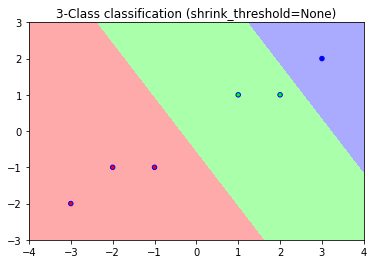

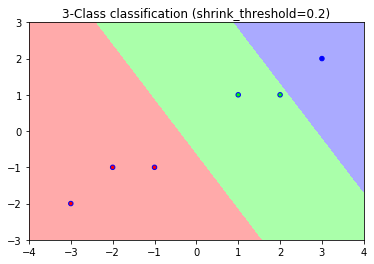

In [73]:
h=0.01
for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='b', s=20)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

## 修改原本model

In [24]:
N = 100
data = np.random.random((N, 7))
x = data[:,0]
y = data[:,1]
points = data[:,2:4]
# color is the length of each vector in `points`
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('jet')(color)

In [29]:
 X=[[0,3,4,0,1,1],
    [0,0,0,5,1,1],
    [6,7,0,8,1,1],
    [3,6,1,5,6,1]]

Y=[12,15,11,10]

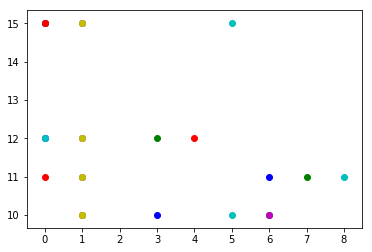

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.array(X)
y = np.array(Y)

fig, ax = plt.subplots()

colors=list('bgrcmykw')

for i, x in enumerate(x_arr.T):
    ax.scatter(x,y, c=colors[i])

plt.show()

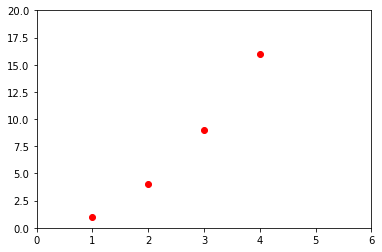

In [31]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [9]:
test_save=[]
for BIGI in range(0,1,1):

    #testxx=test_ini.sort_values('group')
    #testxx_list = []
    for i in range(len(testxx.group.unique())):
        testxx_list.append(testxx[testxx['group']==i+1])
    test=testxx_list[BIGI]

    trainxx=train_ini.sort_values('group')
    df_list = []
    for i in range(len(trainxx.group.unique())):
        df_list.append(trainxx[trainxx['group']==i+1])
    train=df_list[BIGI]

    model = Sequential()
    model.add(Dense(units=50,input_dim=88,kernel_initializer='normal',activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(units=20, activation='sigmoid'))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dense(50))
    #model.add(Dropout(0.45))
    #model.add(Dense(50))
    #model.add(Dropout(0.2))
    #model.add(Dense(50))
    #model.add(Dense(50))
    #model.add(Dropout(0.4))
    #model.add(Dense(50))
    #model.add(Dropout(0.4))
    #model.add(Dense(50))
    
    #import functools
    #ncce=functools.partial(w_categorical_crossentropy, weights=np.array(train['weight']))

    #model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    trainx=train.copy(deep=True)
    testx=test.copy(deep=True)
    trainx.drop(['id', 'weight', 'label', 'era', 'group'],  axis=1, inplace=True )
    testx.drop(['id', 'group'], axis=1, inplace=True)
    
    x_Train_normalize = trainx.as_matrix()
    x_Test_normalize = testx.as_matrix()
    y_Train_Onehot_temp=train['label'].as_matrix()
    
    # Create label used for validation
    label_mat=train['label'].as_matrix()
    labels = [[1, 0] if label_mat[i] == 0 else [0, 1] for i in range(len(label_mat))]
    #labels = [[1, 0] if label_mat[i] == 0 else [0, 1] for i in range(len(label_mat))]
    
    
    #model.add(Dense(units=1,kernel_initializer='normal',activation='softmax'))
    model.add(Dense(units=2,kernel_initializer='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #model.compile(loss=x_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
    
    #model.compile(loss='log_loss',optimizer='adam',metrics=['accuracy'])
    
    #model.load_weights(train['weight']);
    




    train_history=model.fit(x=x_Train_normalize,y=labels,validation_split=0.4,sample_weight=np.array(train['weight']), epochs=10, batch_size=40
                            , verbose=2)
    #train_history=model.fit(x=x_Train_normalize,y=labels,validation_split=0.4, epochs=10, batch_size=200, verbose=2)
    prediction=model.predict_classes(x_Test_normalize)
    proba=model.predict_proba(x_Test_normalize)[:,1];
    #proba=model.predict_proba(x_Test_normalize)[:,0];
    
    test = test.assign(proba=(pd.Series(proba)).values)
    #test = test.sort_values('id');
    test.drop(test.columns[1:90],  axis=1, inplace=True )

    test_save.append(test)
    
    print(model.summary())

Train on 6483 samples, validate on 4322 samples
Epoch 1/10
0s - loss: 2.6244 - acc: 0.5049 - val_loss: 2.6343 - val_acc: 0.4958
Epoch 2/10
0s - loss: 2.5648 - acc: 0.5285 - val_loss: 2.6101 - val_acc: 0.4963
Epoch 3/10
0s - loss: 2.5026 - acc: 0.5556 - val_loss: 2.6280 - val_acc: 0.5217
Epoch 4/10
0s - loss: 2.4134 - acc: 0.5828 - val_loss: 2.6595 - val_acc: 0.5303
Epoch 5/10
0s - loss: 2.3376 - acc: 0.5979 - val_loss: 2.6938 - val_acc: 0.5308
Epoch 6/10
0s - loss: 2.2918 - acc: 0.6003 - val_loss: 2.6906 - val_acc: 0.5310
Epoch 7/10
0s - loss: 2.2450 - acc: 0.6128 - val_loss: 2.6589 - val_acc: 0.5456
Epoch 8/10
0s - loss: 2.2063 - acc: 0.6281 - val_loss: 2.6991 - val_acc: 0.5444
Epoch 9/10
0s - loss: 2.1411 - acc: 0.6377 - val_loss: 2.7309 - val_acc: 0.5386
Epoch 10/10
0s - loss: 2.1034 - acc: 0.6437 - val_loss: 2.7804 - val_acc: 0.5382
6336/7106 [=========================>....] - ETA: 0s_________________________________________________________________
Layer (type)                 Outp

0s - loss: 2.9568 - acc: 0.5504 - val_loss: 2.9255 - val_acc: 0.5687
Epoch 2/10
0s - loss: 2.8565 - acc: 0.5757 - val_loss: 2.9164 - val_acc: 0.5568
Epoch 3/10
0s - loss: 2.8000 - acc: 0.5869 - val_loss: 2.8708 - val_acc: 0.5651
Epoch 4/10
0s - loss: 2.7522 - acc: 0.5907 - val_loss: 2.8375 - val_acc: 0.5814
Epoch 5/10
0s - loss: 2.7127 - acc: 0.5987 - val_loss: 2.8278 - val_acc: 0.5874
Epoch 6/10
0s - loss: 2.6747 - acc: 0.6067 - val_loss: 2.7979 - val_acc: 0.5922
Epoch 7/10
0s - loss: 2.6399 - acc: 0.6136 - val_loss: 2.7818 - val_acc: 0.5930
Epoch 8/10
0s - loss: 2.6070 - acc: 0.6145 - val_loss: 2.7700 - val_acc: 0.5950
Epoch 9/10
0s - loss: 2.5793 - acc: 0.6216 - val_loss: 2.7973 - val_acc: 0.5924
Epoch 10/10
0s - loss: 2.5446 - acc: 0.6238 - val_loss: 2.7948 - val_acc: 0.5967
15072/18424 [=======================>......] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)        

0s - loss: 2.8854 - acc: 0.5523 - val_loss: 2.9333 - val_acc: 0.5713
Epoch 3/10
0s - loss: 2.8206 - acc: 0.5757 - val_loss: 2.8928 - val_acc: 0.5877
Epoch 4/10
0s - loss: 2.7678 - acc: 0.5832 - val_loss: 2.9136 - val_acc: 0.5793
Epoch 5/10
0s - loss: 2.7058 - acc: 0.5928 - val_loss: 2.9219 - val_acc: 0.5880
Epoch 6/10
0s - loss: 2.6734 - acc: 0.6017 - val_loss: 2.9369 - val_acc: 0.5803
Epoch 7/10
0s - loss: 2.6191 - acc: 0.6088 - val_loss: 2.9040 - val_acc: 0.5930
Epoch 8/10
0s - loss: 2.5867 - acc: 0.6175 - val_loss: 2.8899 - val_acc: 0.5903
Epoch 9/10
0s - loss: 2.5204 - acc: 0.6208 - val_loss: 2.8547 - val_acc: 0.5980
Epoch 10/10
0s - loss: 2.4917 - acc: 0.6199 - val_loss: 2.9514 - val_acc: 0.5907
3552/4620 [======================>.......] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                4450      
________________________________________

0s - loss: 2.8522 - acc: 0.5687 - val_loss: 2.8740 - val_acc: 0.5682
Epoch 4/10
0s - loss: 2.7871 - acc: 0.5828 - val_loss: 2.8789 - val_acc: 0.5770
Epoch 5/10
0s - loss: 2.7400 - acc: 0.5859 - val_loss: 2.8881 - val_acc: 0.5674
Epoch 6/10
0s - loss: 2.6863 - acc: 0.5952 - val_loss: 2.8528 - val_acc: 0.5789
Epoch 7/10
0s - loss: 2.6596 - acc: 0.6019 - val_loss: 2.8299 - val_acc: 0.5835
Epoch 8/10
0s - loss: 2.6063 - acc: 0.6106 - val_loss: 2.8662 - val_acc: 0.5726
Epoch 9/10
0s - loss: 2.5900 - acc: 0.6152 - val_loss: 2.8640 - val_acc: 0.5774
Epoch 10/10
0s - loss: 2.5400 - acc: 0.6189 - val_loss: 2.8306 - val_acc: 0.5751
7360/9094 [=======================>......] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 50)                4450      
_________________________________________________________________
dense_47 (Dense)             (None, 20)               

0s - loss: 3.1102 - acc: 0.6110 - val_loss: 3.4559 - val_acc: 0.5690
Epoch 5/10
0s - loss: 3.0343 - acc: 0.6176 - val_loss: 3.5077 - val_acc: 0.5709
Epoch 6/10
0s - loss: 2.9726 - acc: 0.6264 - val_loss: 3.6041 - val_acc: 0.5496
Epoch 7/10
0s - loss: 2.9003 - acc: 0.6398 - val_loss: 3.4736 - val_acc: 0.5700
Epoch 8/10
0s - loss: 2.8795 - acc: 0.6450 - val_loss: 3.5222 - val_acc: 0.5797
Epoch 9/10
0s - loss: 2.8159 - acc: 0.6477 - val_loss: 3.5412 - val_acc: 0.5730
Epoch 10/10
0s - loss: 2.7939 - acc: 0.6475 - val_loss: 3.5162 - val_acc: 0.5706
 9632/11309 [========================>.....] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 50)                4450      
_________________________________________________________________
dense_62 (Dense)             (None, 20)                1020      
_________________________________________________________________


0s - loss: 1.5284 - acc: 0.6119 - val_loss: 2.1043 - val_acc: 0.5185
Epoch 8/10
0s - loss: 1.4589 - acc: 0.6474 - val_loss: 2.0678 - val_acc: 0.5324
Epoch 9/10
0s - loss: 1.3878 - acc: 0.6343 - val_loss: 2.1356 - val_acc: 0.5185
Epoch 10/10
0s - loss: 1.3316 - acc: 0.6458 - val_loss: 2.1990 - val_acc: 0.5324
  32/1620 [..............................] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 50)                4450      
_________________________________________________________________
dense_77 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 42        
Total params: 5,512
Trainable params: 5,512
Non-trainable params: 0
_________________________________________________________________
None
Train on 3116 samples, validate on 20

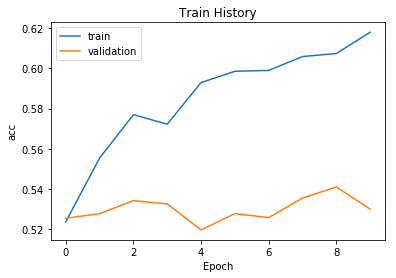

In [10]:
show_train_history(train_history,'acc','val_acc')

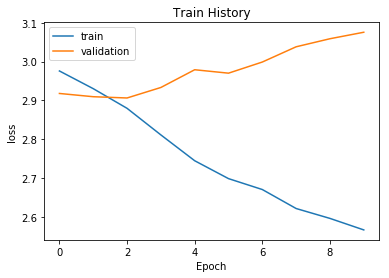

In [11]:
show_train_history(train_history,'loss','val_loss')

In [12]:
#output and save it

result = pd.concat(test_save)
result = result.sort_values('id');
result.to_csv("answer0916.csv", sep=',', encoding='utf-8')

In [13]:
#result

In [14]:
result

,id,proba
0,296104,0.802402
1,296105,0.668149
2,296106,0.691602
3,296107,0.147286
4,296108,0.511898
5,296109,0.798943
6,296110,0.909317
7,296111,0.489411
8,296112,0.280552
9,296113,0.800137


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import backend as K

def get_layer_outputs():
    test_image = 
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):    
    layer_outputs = get_layer_outputs()

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]


    for img in L:
        plt.figure()
        plt.imshow(img, interpolation='nearest')

SyntaxError: invalid syntax (<ipython-input-15-0915cc70fab7>, line 6)